In [ ]:
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [ ]:
path = kagglehub.dataset_download("aakash50897/churn-modellingcsv")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/churn-modellingcsv


In [ ]:
df=pd.read_csv(f"{path}/Churn_Modelling.csv")

In [ ]:
def check(df):
    print(df.shape)
    print(df.info())
    print(df.isnull().sum())
    print(df.duplicated().sum())
    print(df.describe())

In [ ]:
check(df)

(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
RowNumber          0
CustomerId         0
Surname            0
CreditScore   

In [ ]:
var_utilizables_num=["CreditScore","Age","Tenure","Balacnce","NumOfProducts","EstimatedSalary"]
var_utilizables_cat=["Geography","Gender","HasCrCard","IsActiveMember"]
cols_for_corr = ['CreditScore', 'Age', 'Tenure', 'Balance',
                 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                 'EstimatedSalary', 'Exited']

In [ ]:
print(df["Exited"].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


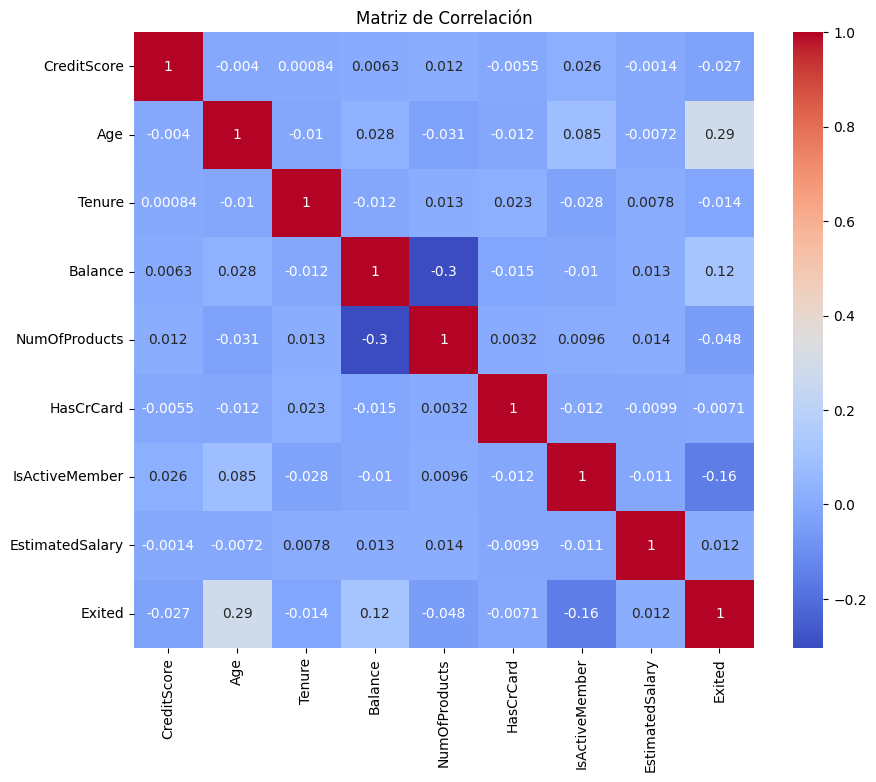

In [ ]:
corr = df[cols_for_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

<Axes: xlabel='Age', ylabel='Balance'>

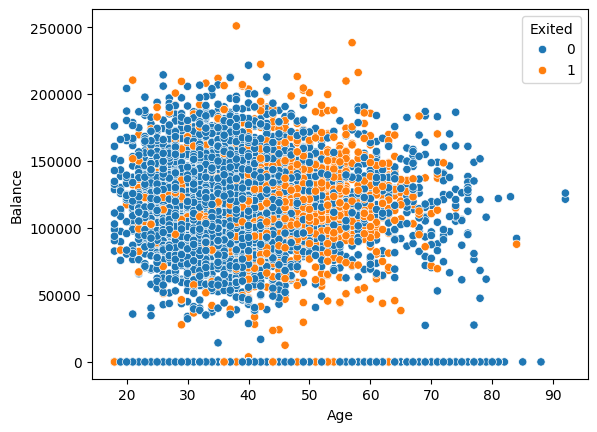

In [ ]:
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=df)


Conclusión:Este gráfico es utilizado para ver cómo la edad y el balance de las cuentas de los clientes, puede influir en si decidirán retirarse del banco

Recomendación: Se recomienda invertir más en beneficios y retención para los clientes mayores de edad, entre los 40 y 60 años, para de esta forma lograr mantenerlos en la compañia


/usr/local/lib/python3.11/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.11/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.11/dist-packages/scorecardpy/condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is

[INFO] creating woe binning ...
>>> There are 1 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
Surname
>>> Continue the binning process?
1: yes 
2: no
Selection: 1


/usr/local/lib/python3.11/dist-packages/scorecardpy/woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  init_bin = dtm.groupby('bin', group_keys=False)['y'].agg([n0, n1])\
/usr/local/lib/python3.11/dist-packages/scorecardpy/woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
/usr/local/lib/python3.11/dist-packages/scorecardpy/woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior 

Binning on 10000 rows and 14 columns in 00:06:05


{'NumOfProducts': <Figure size 640x480 with 2 Axes>,
 'Tenure': <Figure size 640x480 with 2 Axes>,
 'Gender': <Figure size 640x480 with 2 Axes>,
 'EstimatedSalary': <Figure size 640x480 with 2 Axes>,
 'Balance': <Figure size 640x480 with 2 Axes>,
 'RowNumber': <Figure size 640x480 with 2 Axes>,
 'IsActiveMember': <Figure size 640x480 with 2 Axes>,
 'CustomerId': <Figure size 640x480 with 2 Axes>,
 'HasCrCard': <Figure size 640x480 with 2 Axes>,
 'Geography': <Figure size 640x480 with 2 Axes>,
 'Surname': <Figure size 640x480 with 2 Axes>,
 'CreditScore': <Figure size 640x480 with 2 Axes>,
 'Age': <Figure size 640x480 with 2 Axes>}

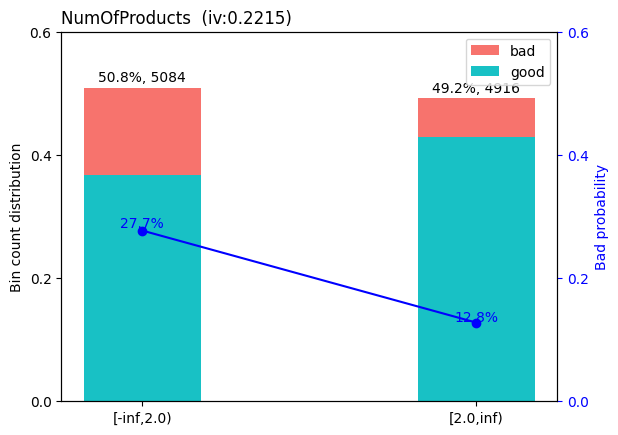

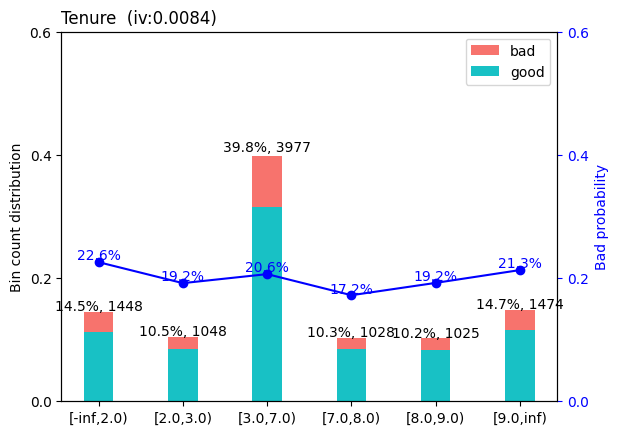

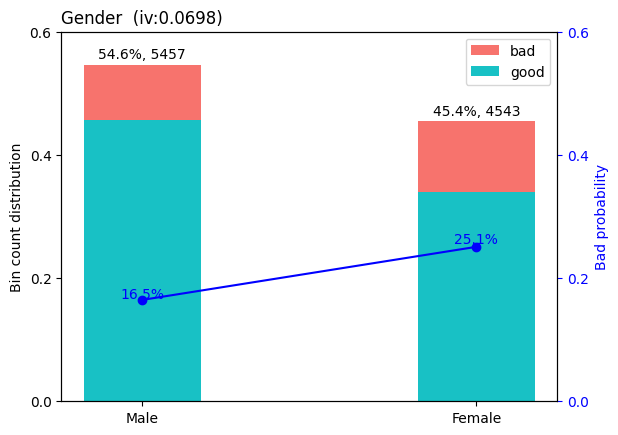

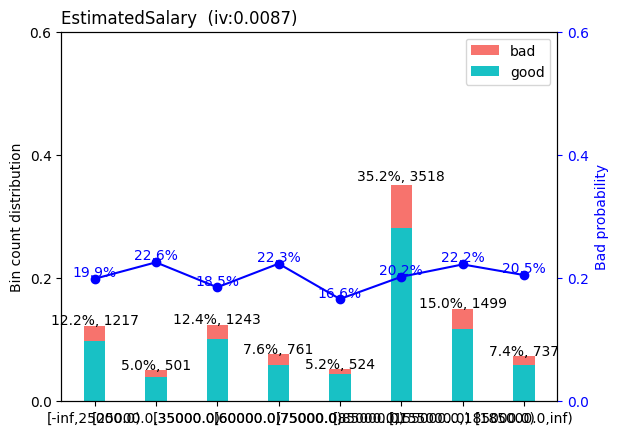

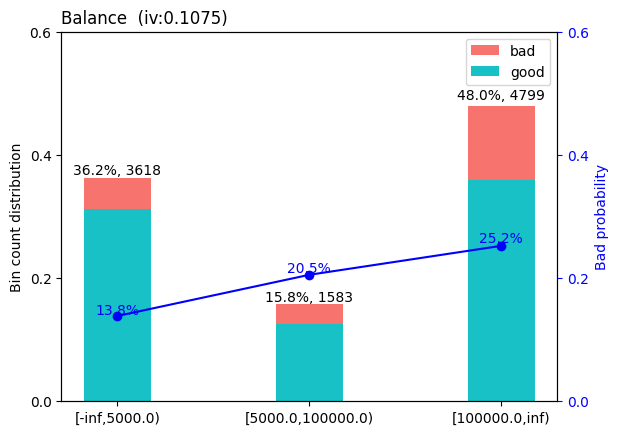

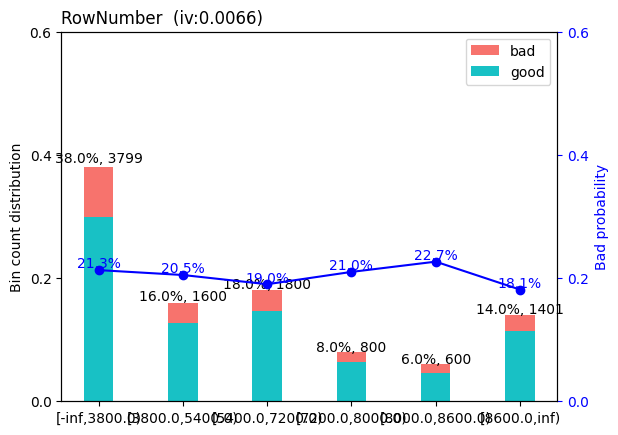

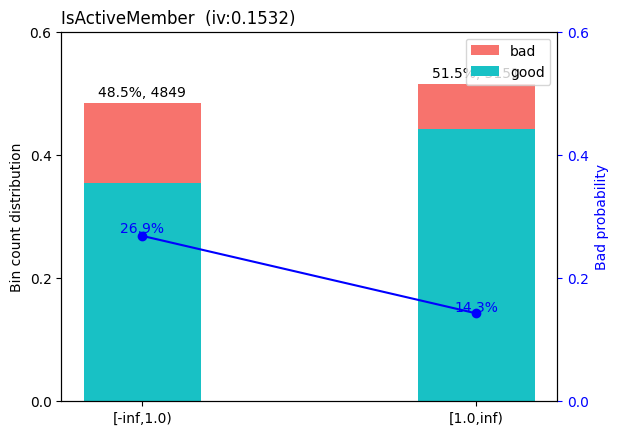

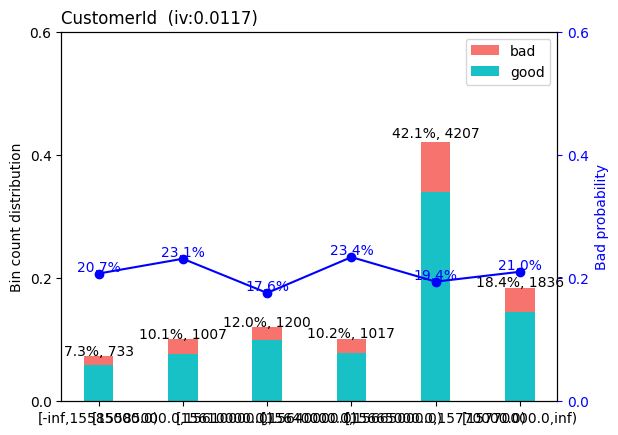

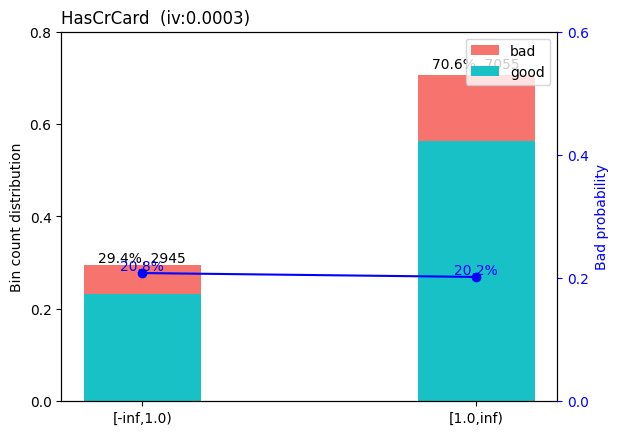

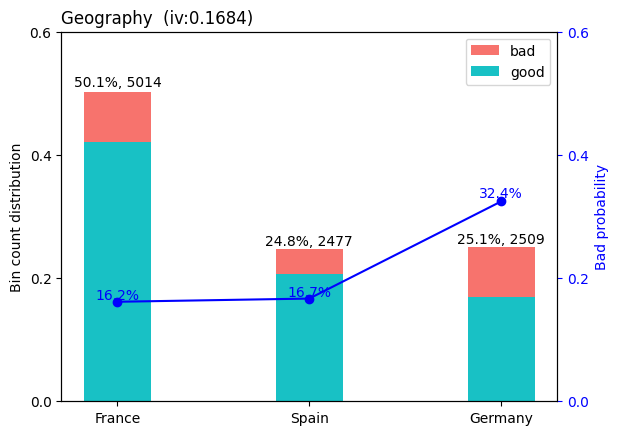

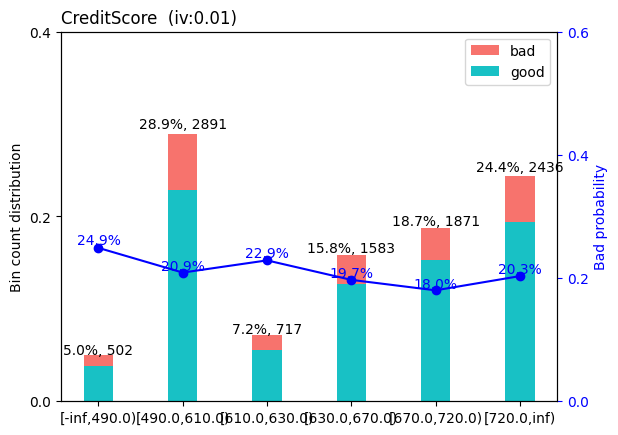

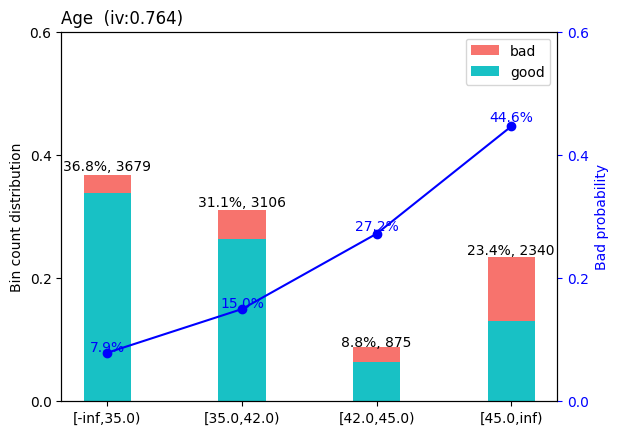

In [ ]:
!pip install scorecardpy
import scorecardpy as sc
df['Exited'] = df['Exited'].astype(int)
bins = sc.woebin(df, y='Exited')
sc.woebin_plot(bins)

El gráfico muestra dónde se concentran la mayoría de tus clientes.

Muestra la tasa de rotación para cada grupo.

El IV muestra si la variable es importante para el modelo predictivo.

Se recomienda utilizar estos gráficos ya que ayuda al momento de elegir las categorías indispensables para el modelo, ver como la tasa de rotación llega a variar por cada grupo, y en qué grupo se debería de enfocar en realizar incentivos

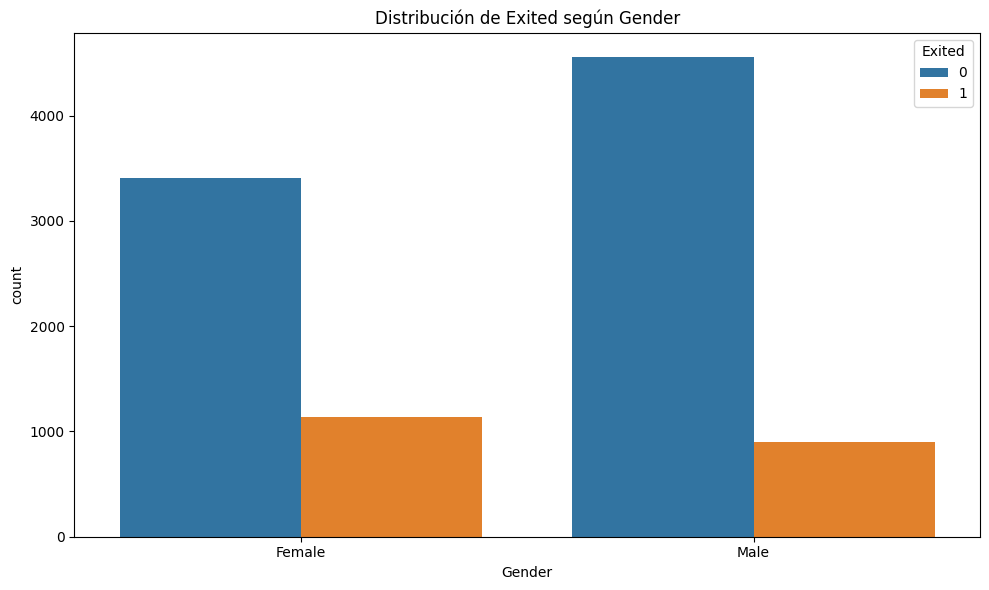

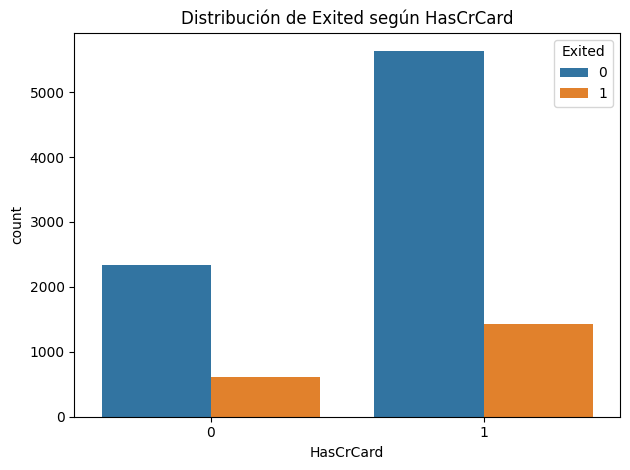

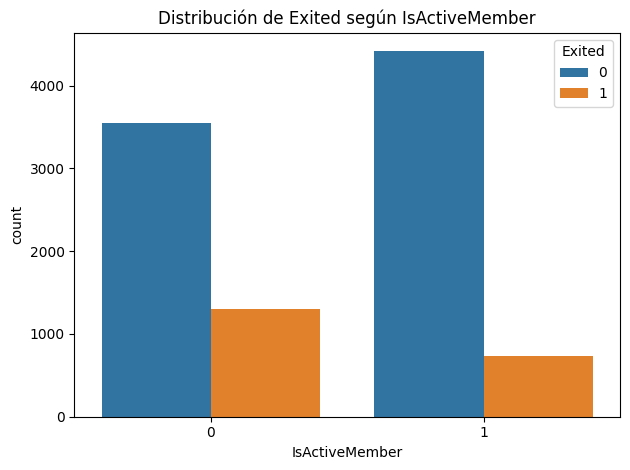

In [ ]:
plt.figure(figsize=(10, 6))
for col in var_utilizables_cat:
    if col != "Geography":
        sns.countplot(x=col, hue='Exited', data=df)
        plt.title(f'Distribución de Exited según {col}')
        plt.tight_layout()
        plt.show()

Este gráfico muestra la cantidad de miembros, según si son activos, si han decidido retirarse de la entidad bancaria.
Esto muestra que no hay mucha diferencia en que si un miembro es o no es activo, simbolice que se vaya del banco.


In [ ]:
print(df['Geography'].unique())


['France' 'Spain' 'Germany']


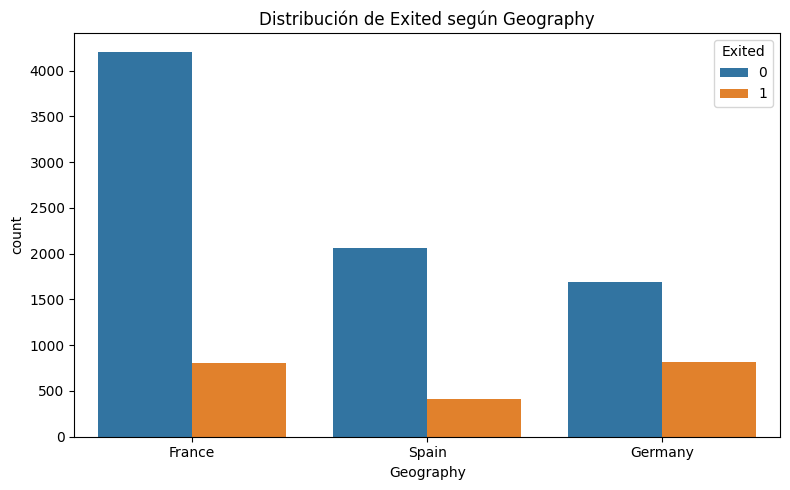

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.xlabel('Geography')
plt.title('Distribución de Exited según Geography')
plt.tight_layout()
plt.show()


Conclusión:Este gráfico es utilizado para ver qué país es el que tiene a los clientes con mayor cantidad de abandono y permanencia

Recomendación: Se recomienda invertir más en Francia, ya que tiene la mayor cantidad de clientes, o en Francia y Alemania, para lograr una mayor diversidad de los mismos

In [ ]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

le = LabelEncoder()
df["Geography"]=le.fit_transform(df["Geography"])
print(df["Geography"])

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 10000, dtype: int64


In [ ]:
!pip install h2o


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import h2o
from h2o.estimators import (
    H2OGradientBoostingEstimator,
    H2ORandomForestEstimator,
    H2ODeepLearningEstimator,
    H2OGeneralizedLinearEstimator
)

df_model = df.drop(columns=["RowNumber", "CustomerId", "Surname"])
X = df_model.drop(columns=["Exited"])
y = df_model["Exited"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["Exited"] = y_resampled

h2o.init()

h2o_df = h2o.H2OFrame(df_resampled)

y = "Exited"
h2o_df[y] = h2o_df[y].asfactor()
x = [col for col in h2o_df.columns if col != y]

train, test = h2o_df.split_frame(ratios=[0.8], seed=1234)

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,1 hour 59 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 months and 15 days
H2O_cluster_name:,H2O_from_python_unknownUser_fd34vb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.122 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
glm = H2OGeneralizedLinearEstimator(family="binomial")
glm.train(x=x, y=y, training_frame=train)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1752339160894_325


GLM Model: summary
    family    link    regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 3.831E-4 )  10                            10                             4                       py_18_sid_9427

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1556221337507987
RMSE: 0.3944897131115065
LogLoss: 0.47707822402674555
AUC: 0.8539828202594043
AUCPR: 0.8507606980758073
Gini: 0.7079656405188086
Null degrees of freedom: 12802
Residual degrees of freedom: 12792
Null deviance: 17748.507303089555
Residual deviance: 12216.065004428847
AIC: 12238.065004428847

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4350676621239614
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      4605  1823  0.2836   (1823.0/6428.0)
1      1094  5281  0.1716   (1094.0/6375.0)
Total  5699  7104  0.2278   (2917.0/12803.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.435068     0.783589  211
max f2                       0.178389     0.859648  319
max f0point5                 0.647703     0.789165  132
max accuracy                 0.518748     0.774818  180
max precision                0.993925     1         0
max recall                   0.00685424   1         399
max specificity              0.993925     1         0
max absolute_mcc             0.518748     0.549634  180
max min_per_class_accuracy   0.509412     0.774113  183
max mean_per_class_accuracy  0.518748     0.774796  180
max tns                      0.993925     6428      0
max fns                      0.993925     6369      0
max fps                      0.00685424   6428      399
max tps                      0.00685424   6375      399
max tnr                      0.993925     1         0
max fnr                      0.993925     0.999059  0
max fpr                      0.00685424   1         399
max tpr                      0.00685424   1         399

Gains/Lift Table: Avg response rate: 49.79 %, avg score: 49.79 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100758                   0.968945           1.93047   1.93047            0.96124          0.977334   0.96124                     0.977334            0.019451        0.019451                   93.0472   93.0472            0.0186731
2        0.0200734                   0.957071           1.96124   1.9458             0.976562         0.962871   0.968872                    0.97013             0.0196078       0.0390588                  96.1244   94.5798            0.0378143
3        0.0300711                   0.949399           1.89848   1.93007            0.945312         0.953164   0.961039                    0.96449             0.0189804       0.0580392                  89.8484   93.0068            0.0557057
4        0.0400687                   0.94133            1.92986   1.93002            0.960938         0.945497   0.961014                    0.959751            0.0192941       0.0773333              

In [ ]:
rf = H2ORandomForestEstimator(ntrees=100, seed=1234)
rf.train(x=x, y=y, training_frame=train)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1752339160894_327


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         2.03662e+06            20           20           20            1538          1692          1616.32

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.10630875068819552
RMSE: 0.3260502272475753
LogLoss: 0.4058216084628649
Mean Per-Class Error: 0.14622682626255232
AUC: 0.9281370962821968
AUCPR: 0.9279492636577278
Gini: 0.8562741925643935

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48389448109711053
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      5384  1044  0.1624   (1044.0/6428.0)
1      829   5546  0.13     (829.0/6375.0)
Total  6213  6590  0.1463   (1873.0/12803.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.483894     0.855534  217
max f2                       0.256889     0.896972  298
max f0point5                 0.678137     0.872036  145
max accuracy                 0.564697     0.855268  188
max precision                0.999992     0.990164  0
max recall                   0            1         399
max specificity              0.999992     0.998133  0
max absolute_mcc             0.564697     0.711293  188
max min_per_class_accuracy   0.516622     0.853647  207
max mean_per_class_accuracy  0.516622     0.855184  207
max tns                      0.999992     6416      0
max fns                      0.999992     5167      0
max fps                      0            6428      399
max tps                      0            6375      399
max tnr                      0.999992     0.998133  0
max fnr                      0.999992     0.81051   0
max fpr                      0            1         399
max tpr                      0            1         399

Gains/Lift Table: Avg response rate: 49.79 %, avg score: 50.92 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0941186                   1                  1.98831    1.98831            0.990041         1           0.990041                    1                   0.187137        0.187137                   98.8314   98.8314            0.18527
2        0.100055                    0.99736            1.95546    1.98636            0.973684         0.998578    0.989071                    0.999916            0.0116078       0.198745                   95.5463   98.6365            0.196567
3        0.150043                    0.969475           1.92986    1.96754            0.960938         0.975469    0.979698                    0.991771            0.0964706       0.295216                   92.9864   96.7541            0.289148
4        0.200031                    0.938588           1.92359    1.95656            0.957812         0.953111    0.974229                    0.98211             0.0961569       0.391373                   92.3588   95.6557            0.381105
5        0.300164                    0.848485           1.82346    1.91216            0.907956         0.89518     0.952121         

In [ ]:
gbm = H2OGradientBoostingEstimator(ntrees=100, seed=1234)
gbm.train(x=x, y=y, training_frame=train)


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1752339160894_375


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         40384                  5            5            5             15            32            27.44

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.09175749963216234
RMSE: 0.3029150039733297
LogLoss: 0.30266382937897646
Mean Per-Class Error: 0.12389504252229828
AUC: 0.9477400100052467
AUCPR: 0.9483203047651876
Gini: 0.8954800200104933

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.462209933961352
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      5538  890   0.1385   (890.0/6428.0)
1      697   5678  0.1093   (697.0/6375.0)
Total  6235  6568  0.124    (1587.0/12803.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.46221      0.877385  214
max f2                       0.231797     0.914293  290
max f0point5                 0.614896     0.891561  168
max accuracy                 0.474944     0.876748  210
max precision                0.995586     1         0
max recall                   0.0191231    1         392
max specificity              0.995586     1         0
max absolute_mcc             0.474944     0.753624  210
max min_per_class_accuracy   0.495566     0.874824  204
max mean_per_class_accuracy  0.474944     0.876782  210
max tns                      0.995586     6428      0
max fns                      0.995586     6354      0
max fps                      0.00704058   6428      399
max tps                      0.0191231    6375      392
max tnr                      0.995586     1         0
max fnr                      0.995586     0.996706  0
max fpr                      0.00704058   1         399
max tpr                      0.0191231    1         392

Gains/Lift Table: Avg response rate: 49.79 %, avg score: 49.79 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100758                   0.989291           2.00831    2.00831            1                0.992284   1                           0.992284            0.0202353       0.0202353                  100.831   100.831            0.0202353
2        0.0200734                   0.986477           2.00831    2.00831            1                0.987952   1                           0.990127            0.0200784       0.0403137                  100.831   100.831            0.0403137
3        0.0300711                   0.983307           2.00831    2.00831            1                0.984865   1                           0.988377            0.0200784       0.0603922                  100.831   100.831            0.0603922
4        0.0400687                   0.980291           2.00831    2.00831            1                0.981807   1                           0.986738            0.0200784       0.0804706                  100.831   100.831            0.0804706
5        0.0500664                   0.977692           2.00831    2.00831            1                0.978906   1                  

In [ ]:
dl = H2ODeepLearningEstimator(epochs=10, seed=1234)
dl.train(x=x, y=y, training_frame=train)


deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1752339160894_461


Status of Neuron Layers: predicting Exited, 2-class classification, bernoulli distribution, CrossEntropy loss, 42,802 weights/biases, 510.7 KB, 128,030 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate             rate_rms               momentum    mean_weight            weight_rms           mean_bias             bias_rms
--  -------  -------  ---------  ---------  ----  ----  --------------------  ---------------------  ----------  ---------------------  -------------------  --------------------  -------------------
    1        10       Input      0.0
    2        200      Rectifier  0.0        0.0   0.0   0.005095337221340742  0.0016625463031232357  0.0         -0.005878437590101385  0.10445275902748108  0.15301570973809203   0.11186179518699646
    3        200      Rectifier  0.0        0.0   0.0   0.19678170255366423   0.2502615451812744     0.0         -0.03152084061825759   0.07677364349365234  0.8516255628141672    0.05756543576717377
    4        2        Softmax               0.0   0.0   0.006867026402323973  0.003967871889472008   0.0         -0.007204453337762971  0.3298804759979248   0.001211270984598091  0.04234658181667328

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.13455630707350621
RMSE: 0.36681917489889515
LogLoss: 0.41330080590532986
Mean Per-Class Error: 0.1646013033291911
AUC: 0.9165323398815115
AUCPR: 0.9183542084554212
Gini: 0.833064679763023

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2591375312219294
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      4065  980   0.1943   (980.0/5045.0)
1      673   4314  0.135    (673.0/4987.0)
Total  4738  5294  0.1648   (1653.0/10032.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.259138     0.839218  272
max f2                       0.129919     0.89108   325
max f0point5                 0.449257     0.852029  202
max accuracy                 0.291892     0.835726  259
max precision                0.999408     1         0
max recall                   0.00442512   1         398
max specificity              0.999408     1         0
max absolute_mcc             0.271893     0.672109  267
max min_per_class_accuracy   0.296123     0.834369  258
max mean_per_class_accuracy  0.271893     0.835841  267
max tns                      0.999408     5045      0
max fns                      0.999408     4944      0
max fps                      0.0028477    5045      399
max tps                      0.00442512   4987      398
max tnr                      0.999408     1         0
max fnr                      0.999408     0.991378  0
max fpr                      0.0028477    1         399
max tpr                      0.00442512   1         398

Gains/Lift Table: Avg response rate: 49.71 %, avg score: 39.20 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100678                   0.995526           2.01163    2.01163            1                0.997918   1                           0.997918            0.0202527       0.0202527                  101.163   101.163            0.0202527
2        0.0200359                   0.990448           2.01163    2.01163            1                0.993081   1             

In [ ]:
models = {'Logistic Regression': glm,
          'Random Forest': rf,
          'Gradient Boosting': gbm,
          'Deep Learning': dl}

for name, model in models.items():
    perf = model.model_performance(test_data=test)
    auc = perf.auc()
    acc = perf.accuracy()[0][1]
    print(f"{name}: AUC = {auc:.4f}, Accuracy = {acc:.4f}")


Logistic Regression: AUC = 0.8406, Accuracy = 0.7653
Random Forest: AUC = 0.9244, Accuracy = 0.8553
Gradient Boosting: AUC = 0.9223, Accuracy = 0.8508
Deep Learning: AUC = 0.8999, Accuracy = 0.8207


Como se puede observar, el modelo que mejor métricsa obtuvo, fue el de RandomForest, por lo que es recomendable utilizarlo para este tipo de clasificaciones

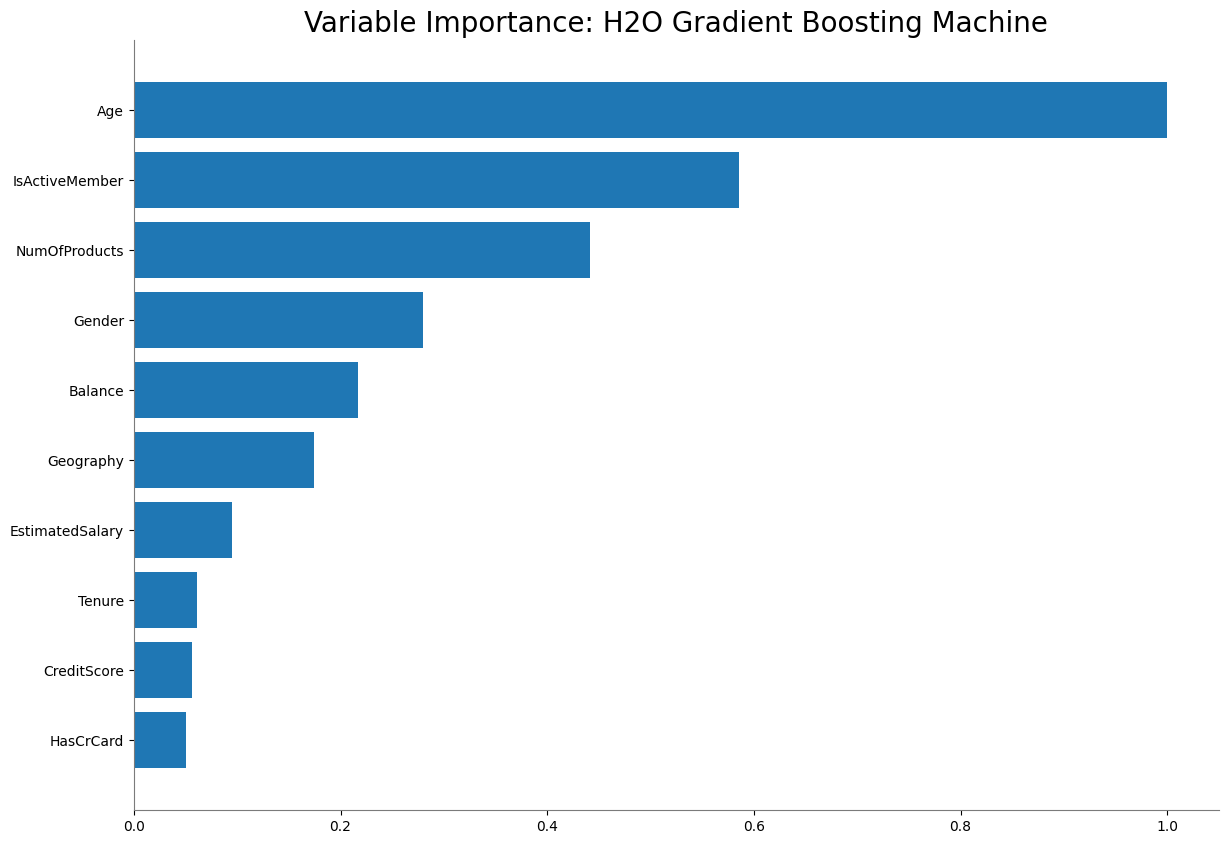

<Figure size 640x480 with 0 Axes>

In [ ]:
gbm.varimp_plot()
